# cdasws Binning Example Jupyter Notebook
This [Jupyter notebook](https://jupyter.org) demonstrates using the [cdasws](https://pypi.org/project/cdasws) Python package to retrieve data from two [cdaweb](https://cdaweb.gsfc.nasa.gov) datasets that have different timestamps and places the data on the same time grid (with optional spike removal).  The data is returned in the [SpacePy data model](https://spacepy.github.io/datamodel.html).  The [AC_H0_SWE](https://cdaweb.gsfc.nasa.gov/misc/NotesA.html#AC_H0_SWE) and [AC_H2_SWE](https://cdaweb.gsfc.nasa.gov/misc/NotesA.html#AC_H2_SWE) datasets are used in this example.  For more information on binning, see [binning in cdaweb](https://cdaweb.gsfc.nasa.gov/CDAWeb_Binning_readme.html).

This notebook contains the following sections:

1. [Prerequisites](#Prerequisites)
2. [Setup](#Setup)
3. [Display Original Data](#Display-Original-Data)
4. [Get Binned Data](#Get-Binned-Data)
5. [Compare Data](#Compare-Data)
6. [Additional Documentation](#Additional-Documentation)

## Prerequisites
Install the prerequisite software the [Python Package Index](https://pypi.org/).

1. pip install spacepy
1. pip install cdasws

## Setup
Execute some preliminary code that is necessary before the code that follows.

In [1]:
from cdasws.cdasws import CdasWs

import matplotlib.pyplot as plt
    
cdas = CdasWs()

## Display Original Data
The following code gets and displays the original, unbinned data.

In [2]:
dataset0 = 'AC_H0_SWE'
parameters = ['Np']
start = '1998-02-04T00:00:00Z'
stop = '1998-02-06T00:00:00Z'
status, data0 = cdas.get_data(dataset0, parameters, start, stop)
print(f'{dataset0}')
print(data0)
dataset1 = 'AC_H2_SWE'
status, data1 = cdas.get_data(dataset1, parameters, start, stop)
print()
print(f'{dataset1}')
print(data1)

AC_H0_SWE
<xarray.Dataset> Size: 32kB
Dimensions:  (Epoch: 2700)
Coordinates:
  * Epoch    (Epoch) datetime64[ns] 22kB 1998-02-04T00:00:31 ... 1998-02-05T2...
Data variables:
    Np       (Epoch) float32 11kB nan nan nan nan ... 14.81 14.48 14.95 13.58
Attributes: (12/31)
    TITLE:                       ['ACE> Solar Wind Parameters']
    Project:                     ['ACE>Advanced Composition Explorer', 'ISTP>...
    Discipline:                  ['Space Physics>Interplanetary Studies']
    Source_name:                 ['AC>Advanced Composition Explorer']
    Data_type:                   ['H0>64-sec Level 2 data']
    Descriptor:                  ['SWEP>ACE Solar Wind Electron Proton Alpha ...
    ...                          ...
    Rules_of_use:                ['See the rules of use available from the AC...
    Alt_logical_source:          ['ACE_SWEPAM_Solar-Wind-Plasma-Level2-H0_64s...
    spase_DatasetResourceID:     ['spase://NASA/NumericalData/ACE/SWEPAM/L2/P...
    DOI:         

## Get Binned Data
The following code gets data after it has been binned with 60 second time intervals and any missing values created by interpolation.

In [3]:
binData = {
    'interval': 60.0,
    'interpolateMissingValues': True,
    'sigmaMultiplier': 4
}
status, data0 = cdas.get_data(dataset0, parameters, start, stop, binData=binData)
print(f'{dataset0}')
print(data0)
status, data1 = cdas.get_data(dataset1, parameters, start, stop, binData=binData)
print()
print(f'{dataset1}')
print(data1)

AC_H0_SWE
<xarray.Dataset> Size: 91kB
Dimensions:                 (record0: 2700, Epoch_bin: 2880)
Coordinates:
  * Epoch_bin               (Epoch_bin) datetime64[ns] 23kB 1998-02-04T00:00:...
    NP_BIN_DELTA_MINUS_VAR  (Epoch_bin) float32 12kB nan nan nan ... nan nan nan
    NP_BIN_DELTA_PLUS_VAR   (Epoch_bin) float32 12kB nan nan nan ... nan nan nan
Dimensions without coordinates: record0
Data variables:
    Epoch                   (record0) datetime64[ns] 22kB 1998-02-04T00:00:31...
    Np                      (Epoch_bin) float32 12kB 16.33 16.33 ... 14.95 13.58
    NP_NBIN                 (Epoch_bin) float32 12kB -0.0 -0.0 -0.0 ... 1.0 1.0
Attributes: (12/31)
    TITLE:                       ['ACE> Solar Wind Parameters']
    Project:                     ['ACE>Advanced Composition Explorer', 'ISTP>...
    Discipline:                  ['Space Physics>Interplanetary Studies']
    Source_name:                 ['AC>Advanced Composition Explorer']
    Data_type:                   ['H0>

## Compare Data
The following code compares the binned data from the two datasets by plotting the values.

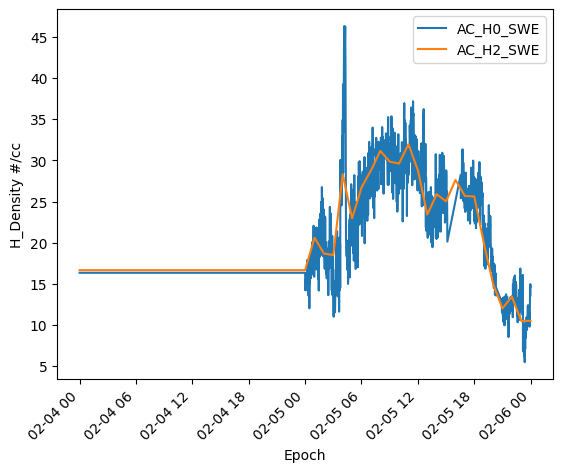

In [4]:
plt.plot(data0['Epoch_bin'], data0['Np'])
plt.plot(data1['Epoch_bin'], data1['Np'])
plt.xlabel(data0['Epoch'].attrs['LABLAXIS'])
plt.xticks(rotation=45, ha='right')
plt.ylabel(data0['Np'].attrs['LABLAXIS'] + ' ' +
           data0['Np'].attrs['UNITS'])
plt.legend([dataset0, dataset1])
plt.show()

## Additional Documentation

View the [cdasws API](../py/cdasws/) for additional functions.  Additional [notebook examples](../#Jupyter_Notebook_Examples) are also available.